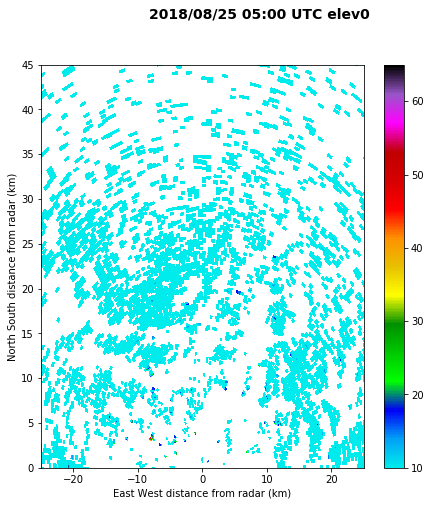

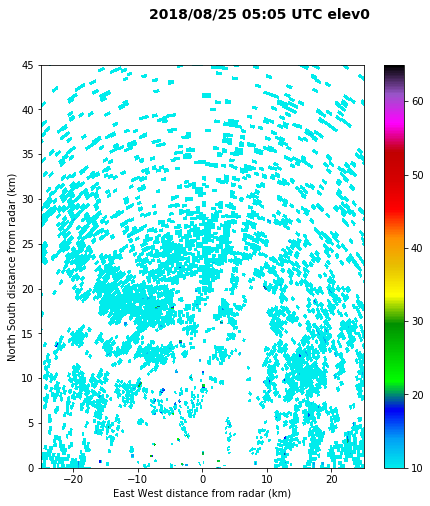

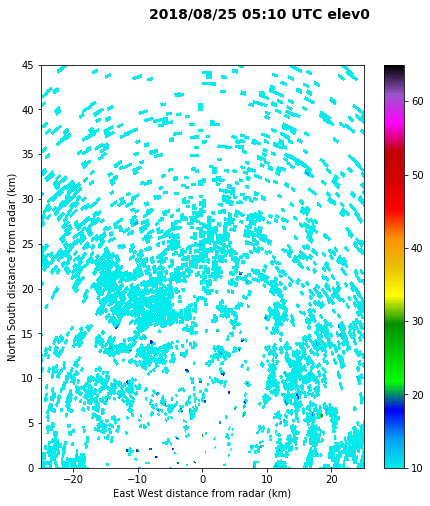

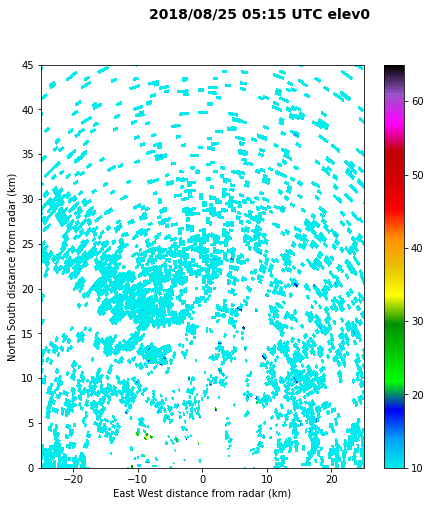

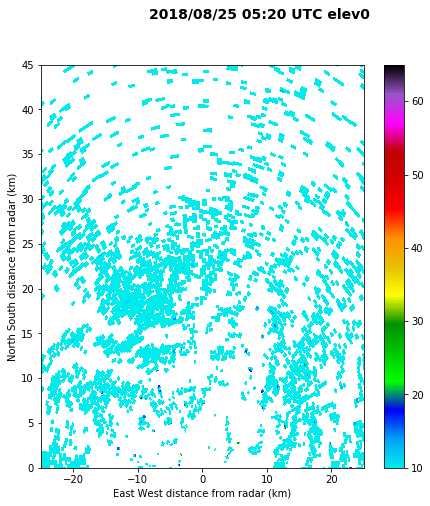

In [5]:
#CASCAVEL : Lendo tipo NC
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors

lon_est, lat_est = [-53.5725, -25.2686]
cidade = 'Cascavel'
x_min, x_max = [-25, 25]
y_min, y_max = [0, 45]


filenames = glob.glob('./*.nc')
# filenames=['9505CAS201510091745ae.nc']
filenames.sort()
# KDP 0:6
# ZDR -2:5
# RHOV 0:1
# DBZH 10:70

radarOptsToPlot = {'vars': ['UH', 'VELH',
                            'RHOHV', 'KDP',
                            'ZDR', 'WIDTHH',
                            'DBZH'],
                   'elev': [x for x in range(0, 10)]}

indexVar = len(radarOptsToPlot['vars'])-1
indexElev = 0

for filename in filenames:
    radar = pyart.io.read_cfradial(filename)
    display = pyart.graph.RadarMapDisplay(radar)
    colorbar_panel_axes = [0.83, 0.185, 0.03, 0.7]
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
    display.plot_ppi(radarOptsToPlot['vars'][indexVar], radarOptsToPlot['elev'][indexElev], vmin=10, vmax=65,
                     cmap='pyart_NWSRef',
                     title='',
                     colorbar_label='',
                     ax=ax,
                     mask_outside=False)

    display.set_limits(xlim=[x_min, x_max], ylim=[y_min, y_max], ax=ax)
    hora = str(filename[17:19])
    minutos = str(filename[19:21])
    year = str(filename[9:13])
    month = str(filename[13:15])
    day = str(filename[15:17])
    plt.suptitle('{0}/{1}/{2} {3}:{4} UTC elev{5}'.format(year, month,
                                                          day, hora,
                                                          minutos, radarOptsToPlot['elev'][indexElev]), size=14, weight='bold')

    # plt.savefig('{0}_{1}_{2}_elev{3}_zoom.png'.format(variaveis[i],
    #                                                  hora,
    #                                                  minutos,
    #                                                  elev),
    #            dpi=300)


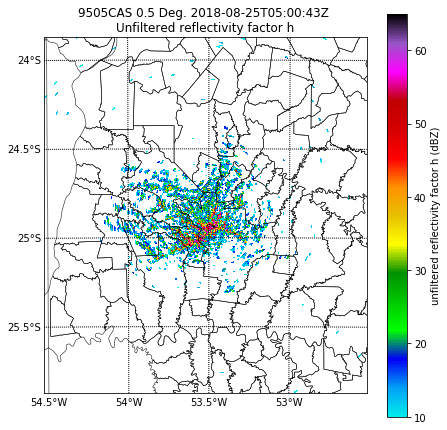

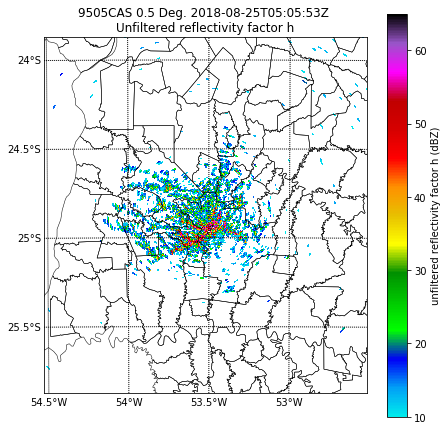

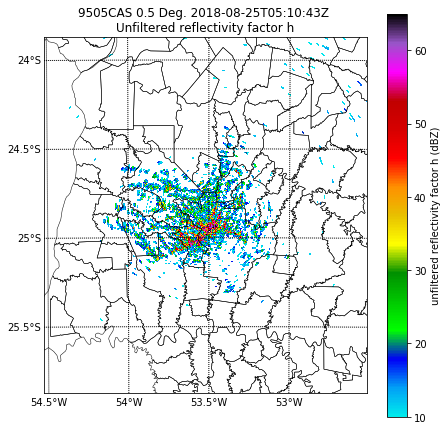

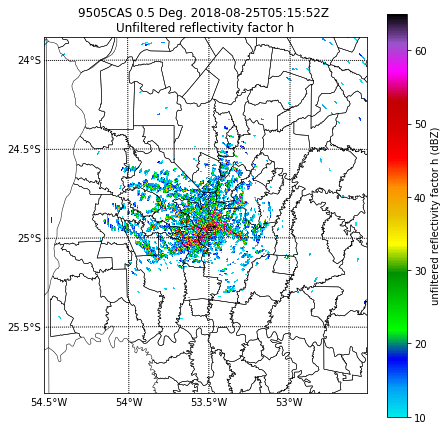

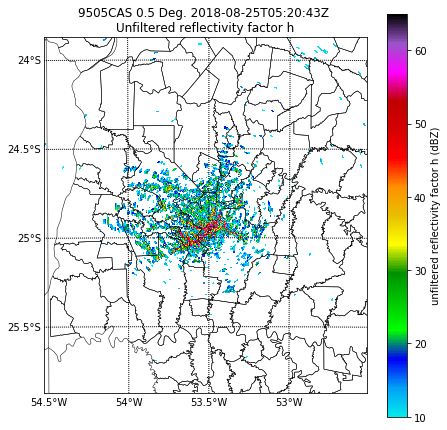

In [2]:
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors


filenames = glob.glob('./*.nc')

filenames.sort()


indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.io.read_cfradial(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}
    display = pyart.graph.RadarMapDisplay(radar)
    fig = plt.figure(figsize=[8, 8])
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    ax = fig.add_axes(map_panel_axes)

    display.plot_ppi_map(radarOptsToPlot['vars'][0],sweep=radarOptsToPlot['elev'][0], vmin=10, vmax=65,
                    min_lon=radar.longitude['data'][0]-1, max_lon=radar.longitude['data'][0]+1, 
                    min_lat=radar.latitude['data'][0]-1,  max_lat=radar.latitude['data'][0]+1,
                    projection='lcc',
                    lon_lines=np.arange(-62., -46., 0.5),
                    lat_lines=np.arange(-30., -20., 0.5),
                    lat_0=radar.latitude['data'][0],
                    lon_0=radar.longitude['data'][0],
                    cmap='pyart_NWSRef',mask_outside=True,
                    shapefile='MUNICIPIOS_polígonos')

    plt.show()

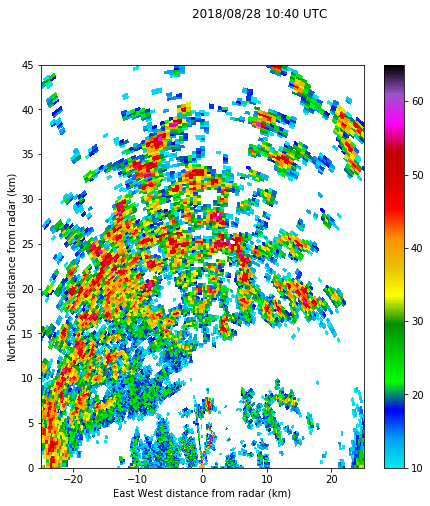

In [12]:
##ODIM files
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors


x_min, x_max = [-25, 25]
y_min, y_max = [0, 45]


filenames = glob.glob('./*.h5')


filenames.sort()
# KDP 0:6
# ZDR -2:5
# RHOV 0:1
# DBZH 10:70


radarOptsToPlot = {'vars': ['total_power'],
                   'elev': [x for x in range(0, 10)]}


indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.aux_io.odim_h5.read_odim_h5(filename)
    display = pyart.graph.RadarMapDisplay(radar)
    colorbar_panel_axes = [0.83, 0.185, 0.03, 0.7]
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
    display.plot_ppi(radarOptsToPlot['vars'][indexVar], vmin=10, vmax=65,
                     cmap='pyart_NWSRef', title='', colorbar_label='',
                     ax=ax, mask_outside=True)

    display.set_limits(xlim=[x_min, x_max], ylim=[y_min, y_max], ax=ax)
    hora = str(filename[23:25])
    minutos = str(filename[26:28])
    year = str(filename[11:15])
    month = str(filename[16:18])
    day = str(filename[19:21])
    plt.suptitle('{0}/{1}/{2} {3}:{4} UTC'.format(year, month,
                                                  day, hora,
                                                  minutos, size=14, weight='bold'))

    # plt.savefig('{0}_{1}_{2}_elev{3}_zoom.png'.format(variaveis[i],
    #                                                  hora,
    #                                                  minutos,
    #                                                  elev),
    #            dpi=300)
    plt.show()


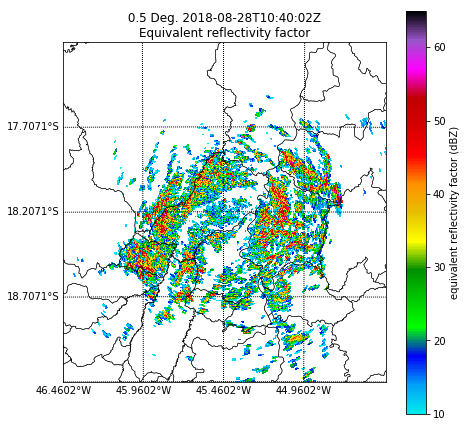

In [15]:
##ODIM files with shapefile
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors


filenames = glob.glob('./*.h5')
filenames.sort()


indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.aux_io.odim_h5.read_odim_h5(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}
    display = pyart.graph.RadarMapDisplay(radar)
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
    display.plot_ppi_map(radarOptsToPlot['vars'][indexVar], sweep=radarOptsToPlot['elev'][indexElev], 
                         vmin=10, vmax=65,
                         min_lon=radar.longitude['data'][0]-1, max_lon=radar.longitude['data'][0]+1, 
                         min_lat=radar.latitude['data'][0]-1,  max_lat=radar.latitude['data'][0]+1,
                         projection='lcc', lon_lines=np.arange(radar.longitude['data'][0]-1, radar.longitude['data'][0]+1, 0.5),
                         lat_lines=np.arange(radar.latitude['data'][0]-1, radar.latitude['data'][0]+1, 0.5), 
                         lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0], 
                         cmap='pyart_NWSRef',mask_outside=True, shapefile='MUNICIPIOS_polígonos')

    plt.show()


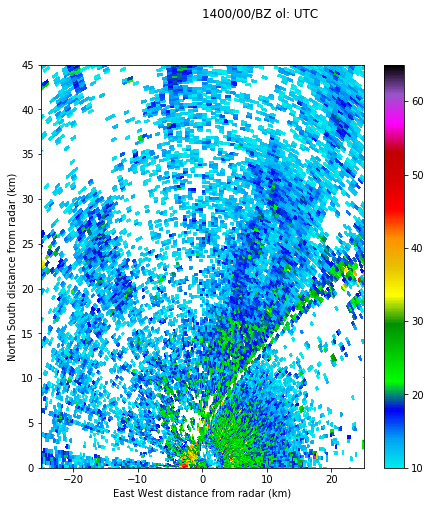

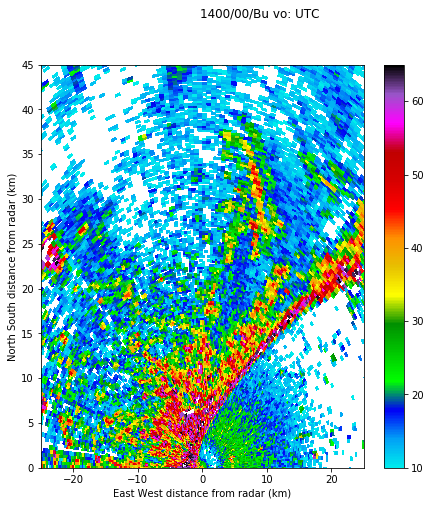

In [11]:
##RAINBOW Files
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors
import wradlib

x_min, x_max = [-25, 25]
y_min, y_max = [0, 45]

filenames = glob.glob('./*.vol')

filenames.sort()
# KDP 0:6
# ZDR -2:5
# RHOV 0:1
# DBZH 10:70

radarOptsToPlot = {'vars': ['reflectivity', 'unfiltered_reflectivity',
                            'cross_correlation_ratio', 'specific_differential_phase',
                            'differential_reflectivity', 'WIDTHH',
                            'reflectivity'],
                   'elev': [x for x in range(0, 10)]}

indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.aux_io.rainbow_wrl.read_rainbow_wrl(filename)
    display = pyart.graph.RadarMapDisplay(radar)
    colorbar_panel_axes = [0.83, 0.185, 0.03, 0.7]
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
#   cbax = fig.add_axes(colorbar_panel_axes)
#   vmin, vmax = [0,.980]
    # vmin, vmax = [[-45].[45]]
    # vmin=-45. vmax=45.
    display.plot_ppi(radarOptsToPlot['vars'][indexVar], vmin=10, vmax=65,
                     cmap='pyart_NWSRef',
                     title='',
                     colorbar_label='',
                     ax=ax,
                     mask_outside=True)

    display.set_limits(xlim=[x_min, x_max], ylim=[y_min, y_max], ax=ax)
    hora = str(filename[23:25])
    minutos = str(filename[26:28])
    year = str(filename[11:15])
    month = str(filename[16:18])
    day = str(filename[19:21])
    plt.suptitle('{0}/{1}/{2} {3}:{4} UTC'.format(year, month,
                                                  day, hora,
                                                  minutos, size=14, weight='bold'))
    indexVar += 1

    # plt.savefig('{0}_{1}_{2}_elev{3}_zoom.png'.format(variaveis[i],
    #                                                  hora,
    #                                                  minutos,
    #                                                  elev),
    #            dpi=300)
    plt.show()


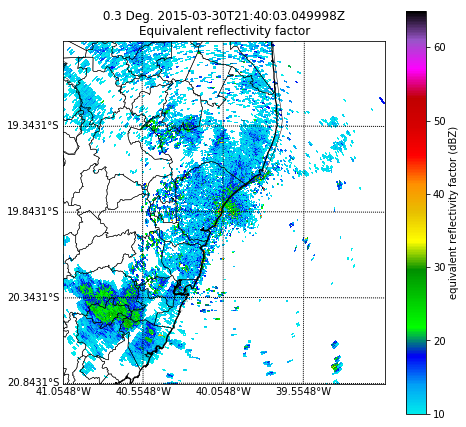

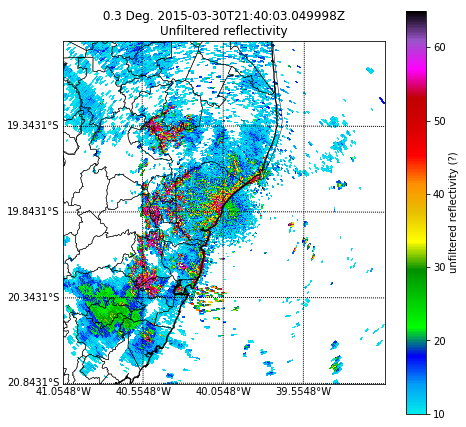

In [16]:
##RAINBOW Files with shapefile
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors


filenames = glob.glob('./*.vol')

filenames.sort()



indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.aux_io.rainbow_wrl.read_rainbow_wrl(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}
    display = pyart.graph.RadarMapDisplay(radar)
    colorbar_panel_axes = [0.83, 0.185, 0.03, 0.7]
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
    display.plot_ppi_map(radarOptsToPlot['vars'][indexVar], sweep=radarOptsToPlot['elev'][indexElev], 
                         vmin=10, vmax=65,
                         min_lon=radar.longitude['data'][0]-1, max_lon=radar.longitude['data'][0]+1, 
                         min_lat=radar.latitude['data'][0]-1,  max_lat=radar.latitude['data'][0]+1,
                         projection='lcc', lon_lines=np.arange(radar.longitude['data'][0]-1, radar.longitude['data'][0]+1, 0.5),
                         lat_lines=np.arange(radar.latitude['data'][0]-1, radar.latitude['data'][0]+1, 0.5), 
                         lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0], 
                         cmap='pyart_NWSRef',mask_outside=True, shapefile='MUNICIPIOS_polígonos')

    plt.show()

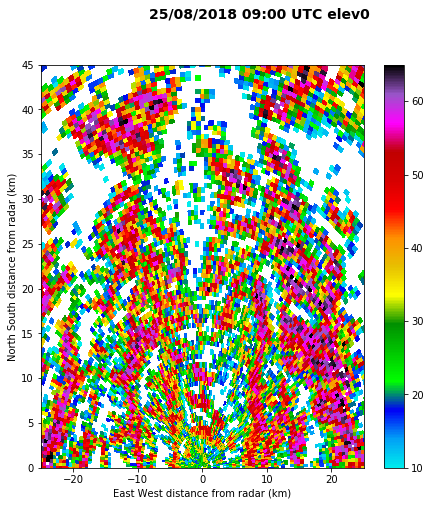

/home/pmello/.local/lib/python3.6/site-packages/pyart/io/sigmet.py:141: RuntimeWarning: invalid value encountered in sqrt
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)


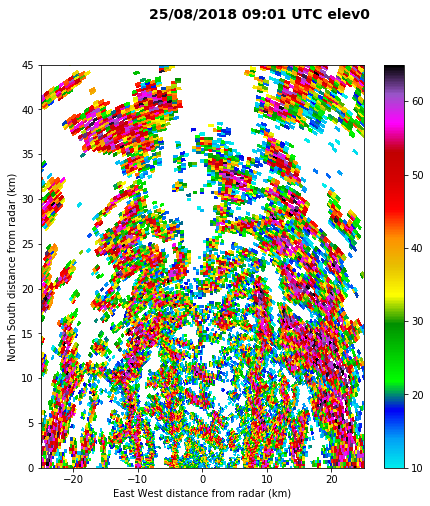

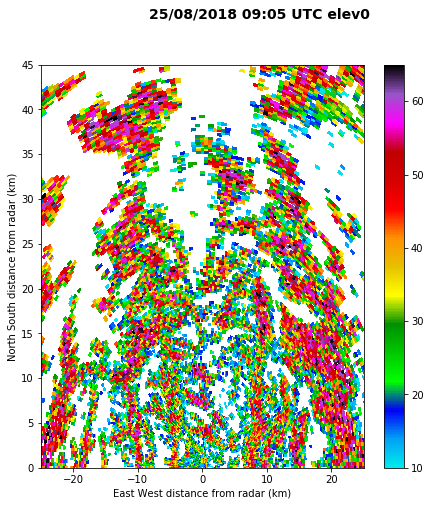

In [4]:
## SIGMET files
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors


x_min, x_max = [-25, 25]
y_min, y_max = [0, 45]


filenames = glob.glob('./TXS*')
#filenames = ['TXS180827112516.RAWW4JU']
filenames.sort()
# KDP 0:6
# ZDR -2:5
# RHOV 0:1
# DBZH 10:70

radarOptsToPlot = {'vars': ['total_power', 'velocity',
                            'cross_correlation_ratio', 'specific_differential_phase',
                            'differential_reflectivity', 'WIDTHH',
                            'reflectivity'],
                   'elev': [x for x in range(0, 10)]}


indexVar = len(radarOptsToPlot['vars'])-1
indexElev = 0

for filename in filenames:
    radar = pyart.io.sigmet.read_sigmet(filename)
    display = pyart.graph.RadarMapDisplay(radar)
    colorbar_panel_axes = [0.83, 0.185, 0.03, 0.7]
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
#   cbax = fig.add_axes(colorbar_panel_axes)
#   vmin, vmax = [0,.980]
    # vmin, vmax = [[-45].[45]]
    # vmin=-45. vmax=45.
    display.plot_ppi('total_power', vmin=10, vmax=65,
                     cmap='pyart_NWSRef',
                     title='',
                     colorbar_label='',
                     ax=ax,
                     mask_outside=True)

    display.set_limits(xlim=[x_min, x_max], ylim=[y_min, y_max], ax=ax)
    hora = str(filename[11:13])
    minutos = str(filename[13:15])
    year = str(filename[5:7])
    month = str(filename[7:9])
    day = str(filename[9:11])
    plt.suptitle('{0}/{1}/20{2} {3}:{4} UTC elev{5}'.format(day, month,
                                                          year, hora,
                                                          minutos, radarOptsToPlot['elev'][indexElev]), size=14, weight='bold')

    # plt.savefig('{0}_{1}_{2}_elev{3}_zoom.png'.format(variaveis[i],
    #                                                  hora,
    #                                                  minutos,
    #                                                  elev),
    #            dpi=300)
    plt.show()
    


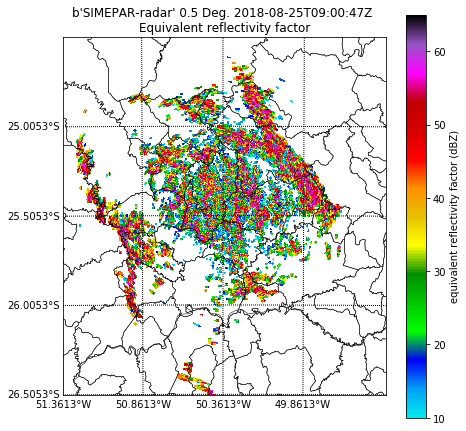

/home/pmello/.local/lib/python3.6/site-packages/pyart/io/sigmet.py:141: RuntimeWarning: invalid value encountered in sqrt
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)


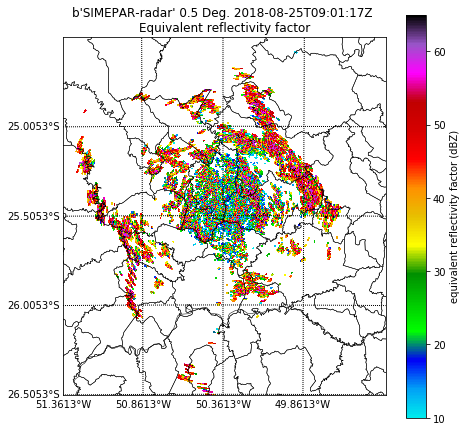

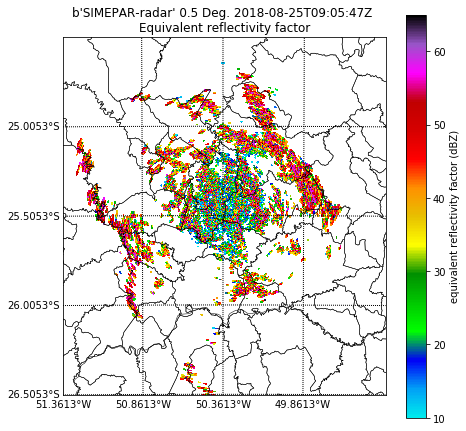

In [17]:
## SIGMET files with shapefile
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors


filenames = glob.glob('./TXS*')
filenames.sort()



indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.io.sigmet.read_sigmet(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}
    display = pyart.graph.RadarMapDisplay(radar)
    colorbar_panel_axes = [0.83, 0.185, 0.03, 0.7]
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
    display.plot_ppi_map(radarOptsToPlot['vars'][indexVar], sweep=radarOptsToPlot['elev'][indexElev], 
                         vmin=10, vmax=65,
                         min_lon=radar.longitude['data'][0]-1, max_lon=radar.longitude['data'][0]+1, 
                         min_lat=radar.latitude['data'][0]-1,  max_lat=radar.latitude['data'][0]+1,
                         projection='lcc', lon_lines=np.arange(radar.longitude['data'][0]-1, radar.longitude['data'][0]+1, 0.5),
                         lat_lines=np.arange(radar.latitude['data'][0]-1, radar.latitude['data'][0]+1, 0.5), 
                         lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0], 
                         cmap='pyart_NWSRef',mask_outside=True, shapefile='MUNICIPIOS_polígonos')

    plt.show()
    


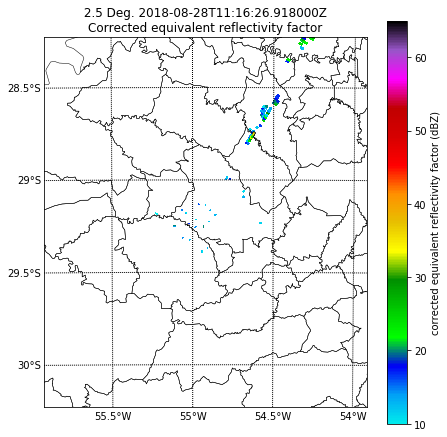

In [18]:
#GAMIC files with shapefile
import pyart
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors

filenames = glob.glob('./*.nc')
filenames=['STI-400--2018-08-28--11-16-27.mvol']
filenames.sort()

indexVar =  0
indexElev = 0

for filename in filenames:
    radar = pyart.aux_io.gamic_hdf5.read_gamic(filename)
    radarOptsToPlot = {'vars': [key for key in radar.fields.keys()],
                       'elev': radar.sweep_number['data']}
    display = pyart.graph.RadarMapDisplay(radar)
    map_panel_axes = [0.12, 0.18, 0.7, 0.7]
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_axes(map_panel_axes)
    display.plot_ppi_map(radarOptsToPlot['vars'][indexVar], sweep=radarOptsToPlot['elev'][indexElev], 
                         vmin=10, vmax=65,
                         min_lon=radar.longitude['data'][0]-1, max_lon=radar.longitude['data'][0]+1, 
                         min_lat=radar.latitude['data'][0]-1,  max_lat=radar.latitude['data'][0]+1,
                         projection='lcc', lon_lines=np.arange(-62., -46., .5),
                         lat_lines=np.arange(-30., -20., .5), lat_0=radar.latitude['data'][0],
                         lon_0=radar.longitude['data'][0], cmap='pyart_NWSRef',mask_outside=True,
                         shapefile='MUNICIPIOS_polígonos')

    plt.show()